In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [6]:
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

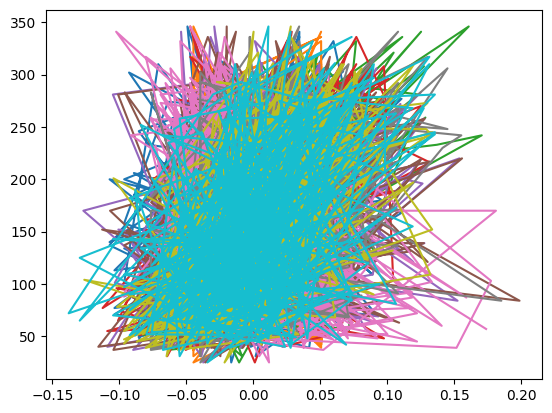

In [11]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot(diabetes.data, diabetes.target)  # Plot some data on the Axes.
plt.show()

In [12]:
diabetes.data.shape, diabetes.target.shape

((442, 10), (442,))

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Load data
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convert to DataFrame for easier plotting
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y


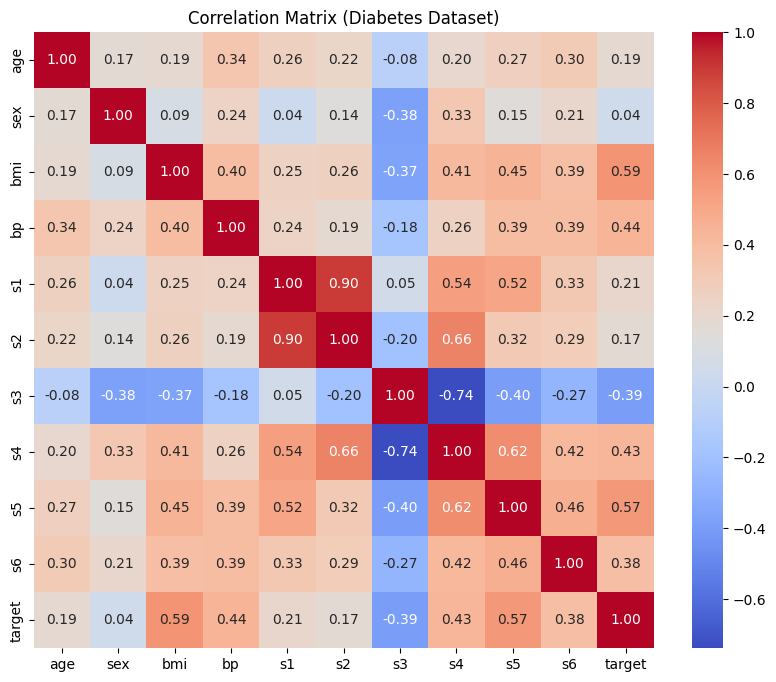

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Diabetes Dataset)")
plt.show()


In [22]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


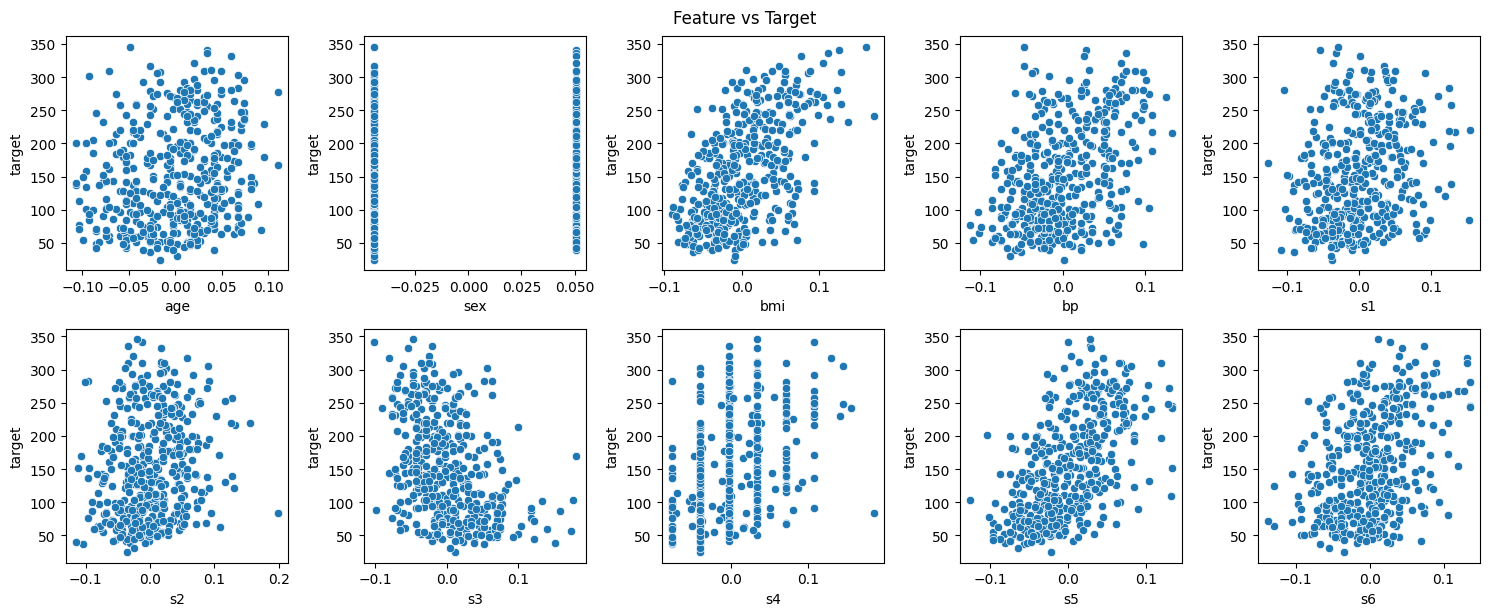

In [24]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    sns.scatterplot(x=diabetes.feature_names[i], y='target', data=df, ax=ax)
plt.tight_layout()
plt.suptitle("Feature vs Target", y=1.02)
plt.show()


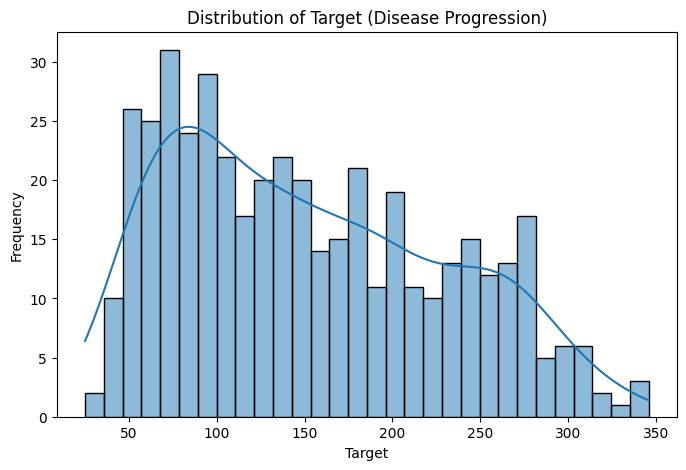

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df['target'], bins=30, kde=True)
plt.title("Distribution of Target (Disease Progression)")
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.show()


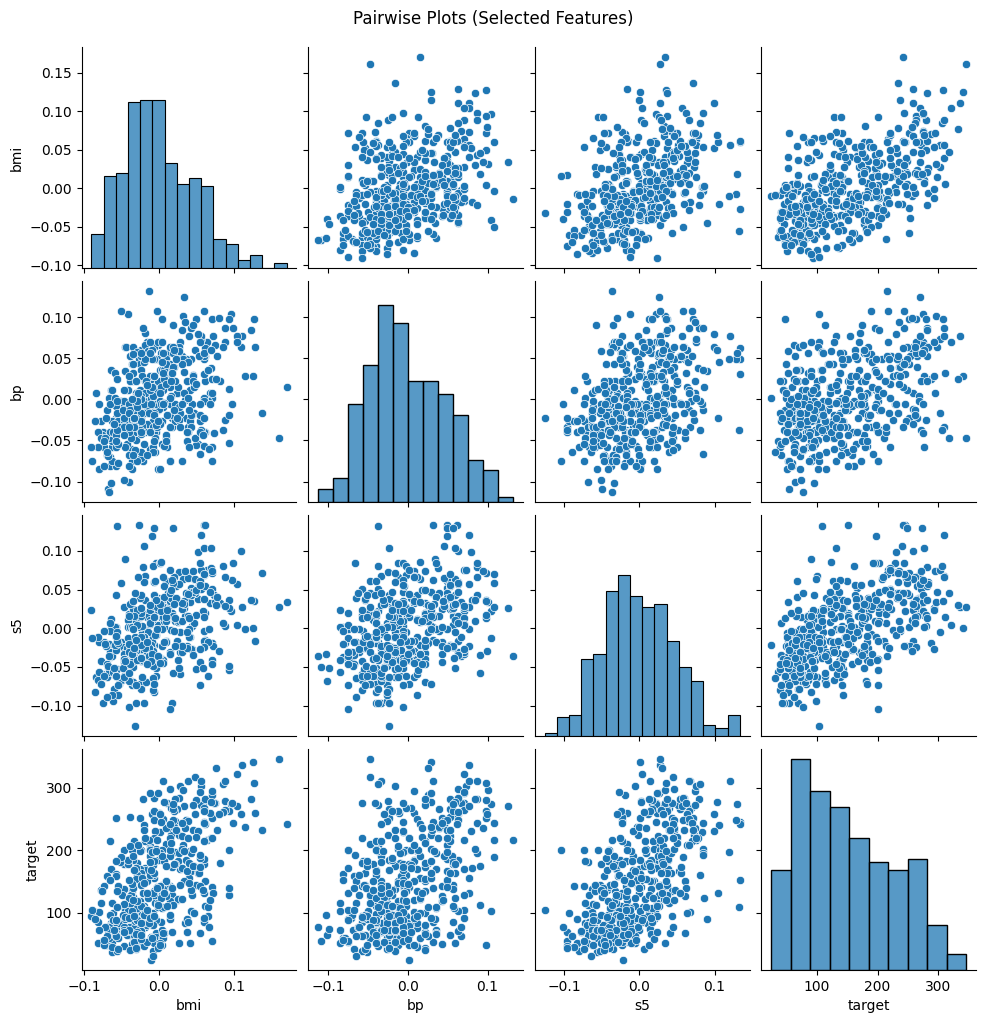

In [26]:
sns.pairplot(df[['bmi', 'bp', 's5', 'target']])
plt.suptitle("Pairwise Plots (Selected Features)", y=1.02)
plt.show()


<Figure size 1200x600 with 0 Axes>

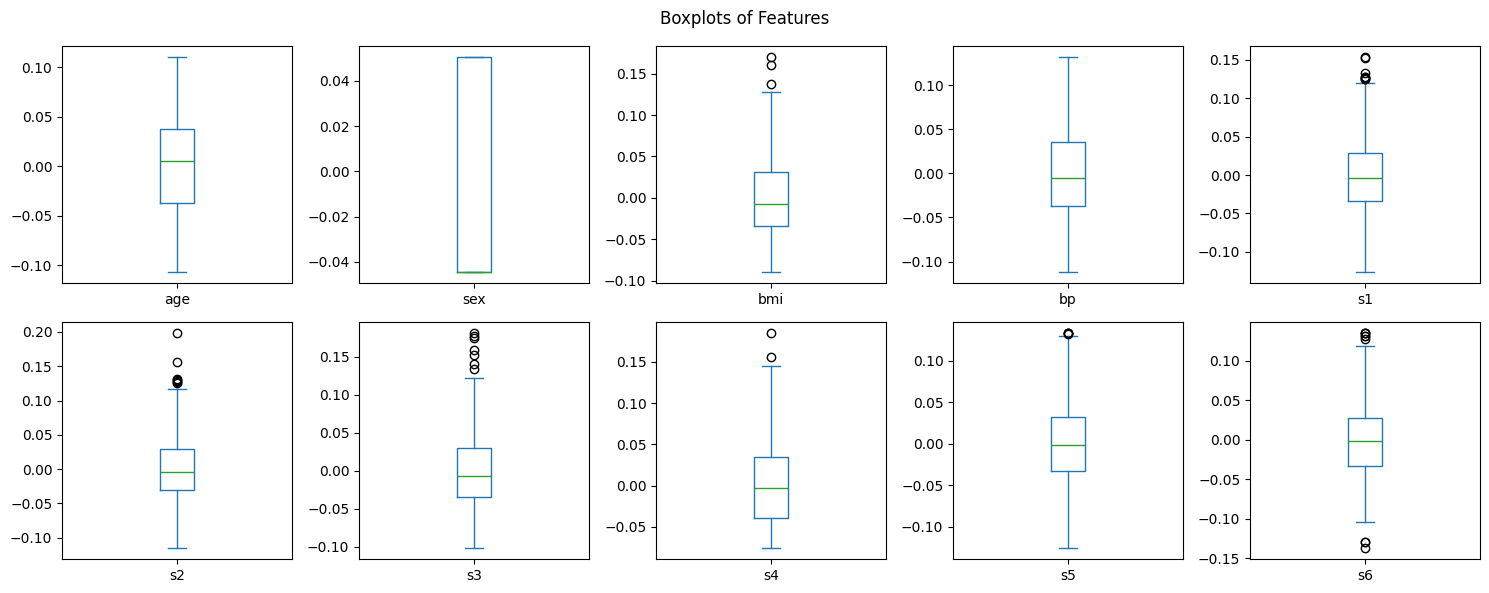

In [27]:
plt.figure(figsize=(12, 6))
df.drop(columns='target').plot(kind='box', subplots=True, layout=(2, 5), figsize=(15, 6), sharey=False)
plt.suptitle("Boxplots of Features")
plt.tight_layout()
plt.show()


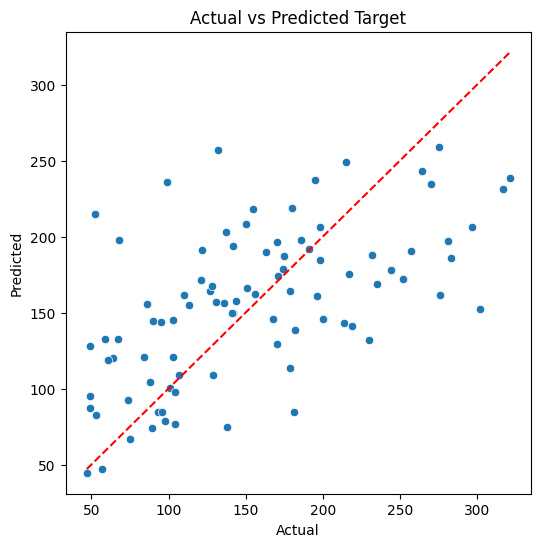

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Target")
plt.show()
